# Testing network with more input features.

The initial network proposed in the scaled vs unscaled performance test is here reapplied on the extended dataset.


In [7]:
from tensorflow import keras
from tensorflow.keras import layers
import sys
sys.path.append("..")
from src.data import Dataset
from src.model import NeuralNetwork
from src.utils import show_plots, show_accuracy_loss 

In [8]:
d = Dataset(dataset_path="../data/processed/extended/train_scaled_extended.csv")
x_train, x_val, y_train, y_val = d.get_splits()

# Building the network
Create a network with 4 layers and train. I am again appliying a rule of thumb for hidden units 
$$\mathit{hidden\;neurons} = \frac{2}{3}\mathit{input} + \mathit{output} $$

In [3]:
net = NeuralNetwork.create_model(neurons=(144, 70, 35, 10),
                                 optimizer=keras.optimizers.RMSprop(), 
                                 loss=keras.losses.SparseCategoricalCrossentropy(), 
                                 metrics=["accuracy"])

70
35


In [4]:
history = net.fit(x_train, 
                  y_train, 
                  validation_data=(x_val, y_val),
                  batch_size=128, 
                  epochs=20, 
                  verbose=0);

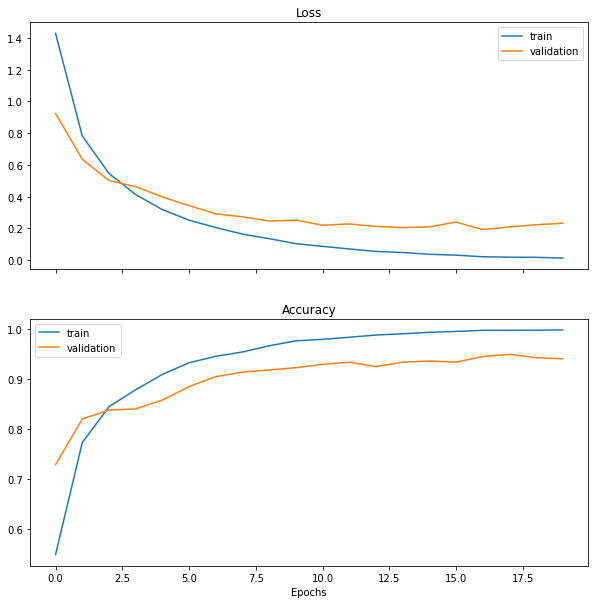

In [5]:
show_plots(history)

In [6]:
show_accuracy_loss(net, scaling="scaled_extended")

7/7 [==============================] - 0s 3ms/step - loss: 1.7081 - accuracy: 0.6906

Accuracy:
	Mean: 0.65093994140625 
	Standard deviation: 0.024736933602620706

Loss:
	Mean: 2.183813238143921 
	Standard deviation: 0.43211555570358473


# Stocastic gradient descent test

In [11]:
net = NeuralNetwork.create_model(neurons=(144, 65, 35, 10),
                                 optimizer=keras.optimizers.SGD(), 
                                 loss=keras.losses.SparseCategoricalCrossentropy(), 
                                 metrics=["accuracy"])

history = net.fit(x_train, 
                  y_train, 
                  validation_data=(x_val, y_val),
                  batch_size=128, 
                  epochs=80, 
                  verbose=0);

70
35


7/7 [==============================] - 0s 2ms/step - loss: 1.1418 - accuracy: 0.6679

Accuracy:
	Mean: 0.6536739349365235 
	Standard deviation: 0.025366824730474528

Loss:
	Mean: 1.3512714147567748 
	Standard deviation: 0.2947984858277036


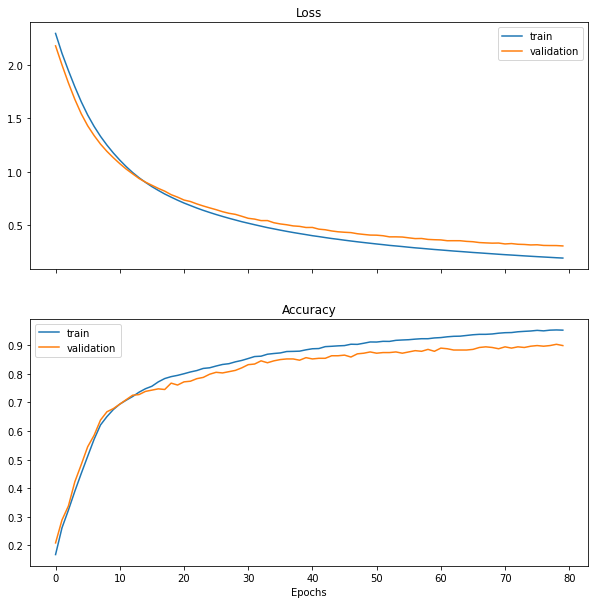

In [12]:

show_plots(history)

show_accuracy_loss(net, scaling="scaled_extended")

## Results

After extending the dataset with 12 new features the accuracy improved from about 0.58 to about 0.65, that's a good result considering the initial performance was about 0.5 on the unscaled and unextended dataset.